<a href="https://colab.research.google.com/github/ohazem1/Data-Science-Projects/blob/main/Regression_Mini-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Omar Hazem Wagdy

ID: 49-0581

Tutorial: T5

---

Name: Ahmed Tarek Youssef

ID: 49-4345

Tutorial: T5

---

Name:

ID:

Tutorial:

---


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company in the industry and its MMR estimate is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period.


## Importing Libraries \& Dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2022/main/data/car_prices.csv')

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

We used info() method to investigate the  data types of each column in the dataset and investigate the non null values 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  object 
 14  sellingprice  46578 non-null  object 
 15  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 5.7+ MB


We used describe() and included all to get a more statical summary of the data

In [ ]:
# Using describe() to get a more statsitcal summary of the data 
df.describe(include='all')

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
count,46578.000000,46578,46578,46578,46578,46578,46578,46578,46578.000000,46578,46578,46578,46578,46578,46578,46578
unique,NaN,48,648,1097,71,2,46578,34,NaN,39460,20,17,4686,1021,953,2286
top,NaN,Ford,Altima,Base,Sedan,automatic,5npeb4acxdh702805,fl,NaN,1.0mi,black,black,"ford motor credit company,llc",$11300,$12000,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,NaN,7871,1610,4851,17171,44928,1,7451,NaN,86,9156,20734,1733,168,397,490
mean,2010.203401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.424265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.831316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.944009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1990.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


we used .value_counts() to count the values of the body column and understand them more as they are very inconsistent 

In [ ]:
df['body'].value_counts()

Sedan                      17171
SUV                         9942
sedan                       3686
suv                         1994
Hatchback                   1869
                           ...  
CTS Wagon                      1
granturismo convertible        1
promaster cargo van            1
Transit Van                    1
xtracab                        1
Name: body, Length: 71, dtype: int64

investigating a part of the dataset

In [ ]:
df.head(20)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
5,2014,Kia,Optima,LX,sedan,automatic,5xxgm4a70eg329048,co,4.6,8386.0mi,black,gray,"kia motors america, inc",$15100,$15500,Tue Jun 16 2015 05:00:00 GMT-0700 (PDT)
6,2007,Chevrolet,Avalanche,LS,Crew Cab,automatic,3gnfk12387g117727,wa,3.6,100676.0mi,gray,black,lexus of tacoma at fife,$13900,$13600,Wed Jan 21 2015 05:20:00 GMT-0800 (PST)
7,2008,Cadillac,CTS,Base,Sedan,automatic,1g6dv57v180180380,ca,4.6,87860.0mi,white,beige,aaero sweet company,$10950,$14700,Wed Jan 14 2015 04:15:00 GMT-0800 (PST)
8,2011,Mercedes-Benz,E-Class,E350,Sedan,automatic,wddhf5gb6ba419589,il,1.7,27819.0mi,gray,black,wells fargo dealer services,$26600,$20000,Thu Jan 15 2015 02:00:00 GMT-0800 (PST)
9,2014,Kia,Forte,LX,Sedan,automatic,knafx4a60e5219872,nv,4.9,4046.0mi,blue,gray,"kia motors america, inc",$12900,$13600,Fri Mar 06 2015 04:00:00 GMT-0800 (PST)


investigating a part of the dataset

In [ ]:
df.tail(20)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
46558,2014,Hyundai,Equus,Signature,Sedan,automatic,kmhgh4jh1eu082187,fl,3.9,7264.0mi,black,beige,trucks unlimited inc,$42400,$41000,Wed Feb 18 2015 01:30:00 GMT-0800 (PST)
46559,2011,Mazda,CX-7,i SV,suv,automatic,jm3er2a50b0398208,ca,3.0,54715.0mi,black,black,gm financial,$10750,$10200,Wed Jun 17 2015 05:30:00 GMT-0700 (PDT)
46560,2014,Jeep,Compass,Sport,SUV,automatic,1c4njcba9ed812035,pa,4.0,19000.0mi,white,black,hertz corporation/gdp,$14050,$13400,Thu Jan 22 2015 01:30:00 GMT-0800 (PST)
46561,2003,Acura,MDX,Base,SUV,automatic,2hnyd18223h501338,ga,1.9,139547.0mi,gold,brown,gwinnett place honda,$4450,$2900,Tue Feb 10 2015 05:00:00 GMT-0800 (PST)
46562,2012,Nissan,Sentra,2.0 S,Sedan,automatic,3n1ab6ap3cl621692,md,3.0,50009.0mi,gray,gray,capital one auto finance,$8875,$6800,Tue Jan 13 2015 09:30:00 GMT-0800 (PST)
46563,2013,Ford,Fusion,SE,Sedan,automatic,3fa6p0h70dr185766,va,3.5,98118.0mi,—,black,wheels exchange llc,$10800,$10500,Wed Feb 25 2015 01:30:00 GMT-0800 (PST)
46564,2012,Toyota,Prius v,Three,Wagon,automatic,jtdzn3eu4c3147186,wa,2.9,49180.0mi,black,black,toyota financial services,$18100,$15400,Tue Dec 23 2014 15:05:00 GMT-0800 (PST)
46565,2013,Nissan,Sentra,SR,Sedan,automatic,3n1ab7ap7dl626112,nc,4.6,37643.0mi,black,black,capital nissan of wilmington,$11300,$11900,Fri Jan 09 2015 09:30:00 GMT-0800 (PST)
46566,2012,Chrysler,200,LX,sedan,automatic,1c3ccbab6cn169063,in,4.0,69117.0mi,blue,tan,santander consumer,$8000,$8000,Thu Jun 18 2015 03:10:00 GMT-0700 (PDT)
46567,2012,Hyundai,Veloster,Base,Hatchback,automatic,kmhtc6ad1cu079812,fl,4.2,34203.0mi,gray,black,hyundai motor finance,$12100,$13400,Tue Feb 17 2015 01:30:00 GMT-0800 (PST)


counting the null values to check for null values

In [ ]:
df.isna().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

investigating the interior column to understand more about the '-'

In [ ]:
df['interior'].value_counts()

black        20734
gray         15020
beige         4917
tan           3777
—              988
brown          694
blue           101
red             92
silver          88
off-white       39
purple          31
gold            26
white           23
burgundy        20
green           16
orange          11
yellow           1
Name: interior, dtype: int64

investigating the color column to understand more about the '-'

In [ ]:
df['color'].value_counts()


black        9156
white        8693
gray         7046
silver       6982
blue         4244
red          3685
—            2246
gold          948
green         891
burgundy      785
beige         744
brown         529
orange        195
purple        137
off-white     129
yellow         99
charcoal       49
turquoise      15
pink            3
lime            2
Name: color, dtype: int64

## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

Capetlizing Coumn Headers 

In [ ]:
# Capetlizing Columns Headers 

df.columns = df.columns.str.capitalize()

df.head()

,Year,Make,Model,Trim,Body,Transmission,Vin,State,Condition,Odometer,Color,Interior,Seller,Mmr,Sellingprice,Saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


Removing the dollar sign ($) from mmr and selling price to transfrom the datatype from object to int 

In [ ]:
# Removing the dollar sign ($) from mmr and selling price to transfrom the datatype from object to int 
df['Sellingprice']=df['Sellingprice'].replace({'\$':""},regex=True)
df['Mmr']=df['Mmr'].replace({'\$':""},regex=True)

df[['Mmr','Sellingprice']].head()

,Mmr,Sellingprice
0,11000,10900
1,28700,29900
2,22200,24200
3,3675,3200
4,22500,22100


change the data type of mmr from obect to int and selling price from object to int not float asuming that no car is sold for fractions or cents 

In [ ]:
#change the data type of mmr and selling price from object to int 
df['Mmr'] = df['Mmr'].astype(int)
df['Sellingprice'] = df['Sellingprice'].astype(int)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          46578 non-null  int64  
 1   Make          46578 non-null  object 
 2   Model         46578 non-null  object 
 3   Trim          46578 non-null  object 
 4   Body          46578 non-null  object 
 5   Transmission  46578 non-null  object 
 6   Vin           46578 non-null  object 
 7   State         46578 non-null  object 
 8   Condition     46578 non-null  float64
 9   Odometer      46578 non-null  object 
 10  Color         46578 non-null  object 
 11  Interior      46578 non-null  object 
 12  Seller        46578 non-null  object 
 13  Mmr           46578 non-null  int64  
 14  Sellingprice  46578 non-null  int64  
 15  Saledate      46578 non-null  object 
dtypes: float64(1), int64(3), object(12)
memory usage: 5.7+ MB


Removing mi from odometer to be able to change from object to float 

In [ ]:
#removing mi from odometer to be able to change from object to float 
df['Odometer']=df['Odometer'].replace({'mi':""},regex=True)
df[['Odometer']].head()

,Odometer
0,50404.0
1,17846.0
2,21122.0
3,145303.0
4,6714.0


changing the datatype of odometer from object to float

In [ ]:
#changing the datatype of odometer from object to float

df['Odometer'] = df['Odometer'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          46578 non-null  int64  
 1   Make          46578 non-null  object 
 2   Model         46578 non-null  object 
 3   Trim          46578 non-null  object 
 4   Body          46578 non-null  object 
 5   Transmission  46578 non-null  object 
 6   Vin           46578 non-null  object 
 7   State         46578 non-null  object 
 8   Condition     46578 non-null  float64
 9   Odometer      46578 non-null  float64
 10  Color         46578 non-null  object 
 11  Interior      46578 non-null  object 
 12  Seller        46578 non-null  object 
 13  Mmr           46578 non-null  int64  
 14  Sellingprice  46578 non-null  int64  
 15  Saledate      46578 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 5.7+ MB


Uppercasing of the state column values 

In [ ]:
#uppercasing of the state column values 
df['State'] = df['State'].str.upper()

df[['State']].head()

,State
0,MA
1,FL
2,FL
3,FL
4,WA


Reducing the ’body’ categories into a few main types to eliminate the inconsistency 

In [ ]:
df.loc[df['Body'].str.contains("suv",case = True),'Body'] = 'SUV'
df.loc[df['Body'].str.contains("sedan",case = False),'Body'] = 'Sedan'
df.loc[df['Body'].str.contains("cab",case = False),'Body'] = 'Pickup Truck'
df.loc[df['Body'].str.contains("cab",case = False),'Body'] = 'Pickup Truck'
df.loc[df['Body'].str.contains("coupe",case = False),'Body'] = 'Coupe'
df.loc[df['Body'].str.contains("koup",case = False),'Body'] = 'Coupe'
df.loc[df['Body'].str.contains("convertible",case = False),'Body'] = 'Convertible'
df.loc[df['Body'].str.contains("hatchback",case = False),'Body'] = 'Hatchback'
df.loc[df['Body'].str.contains("minivan",case = False),'Body'] = 'Minivan'
df.loc[df['Body'].str.contains("wagon",case = False),'Body'] = 'Wagon'
df.loc[df['Body'].str.contains("E-Series Van",case = False),'Body'] = 'Van'
df.loc[df['Body'].str.contains("e-series Van",case = False),'Body'] = 'Van'
df.loc[df['Body'].str.contains("van",case = False),'Body'] = 'Van'
df.loc[df['Body'].str.contains("supercrew",case = False),'Body'] = 'Pickup Truck'

df['Body'].value_counts()

Sedan           21574
SUV             11936
Pickup Truck     3977
Van              2632
Hatchback        2270
Coupe            1787
Wagon            1438
Convertible       964
Name: Body, dtype: int64

checking for null values in the body to confirm a right reduction 

In [ ]:
df.isna().sum()

Year            0
Make            0
Model           0
Trim            0
Body            0
Transmission    0
Vin             0
State           0
Condition       0
Odometer        0
Color           0
Interior        0
Seller          0
Mmr             0
Sellingprice    0
Saledate        0
dtype: int64

In [ ]:
df['Body'].head(30)

0            Sedan
1              SUV
2            Sedan
3              SUV
4              Van
5            Sedan
6     Pickup Truck
7            Sedan
8            Sedan
9            Sedan
10             SUV
11           Sedan
12           Sedan
13           Wagon
14    Pickup Truck
15           Sedan
16    Pickup Truck
17           Wagon
18             SUV
19           Coupe
20             Van
21             SUV
22           Sedan
23    Pickup Truck
24             Van
25             SUV
26           Sedan
27           Sedan
28             SUV
29    Pickup Truck
Name: Body, dtype: object

## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

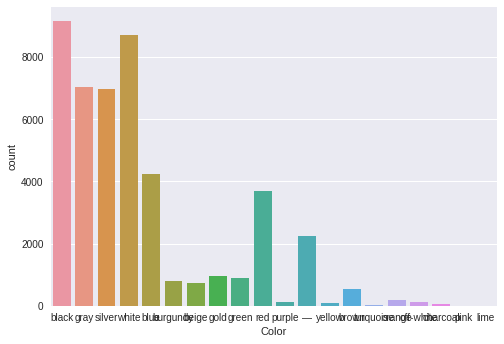

In [ ]:
# Basic, minimal plot example
sns.countplot(x='Color', data=df)

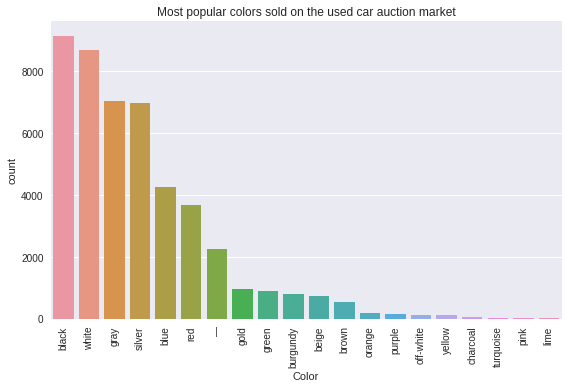

In [ ]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('Color').size().sort_values(ascending=False)
sns.countplot(x='Color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

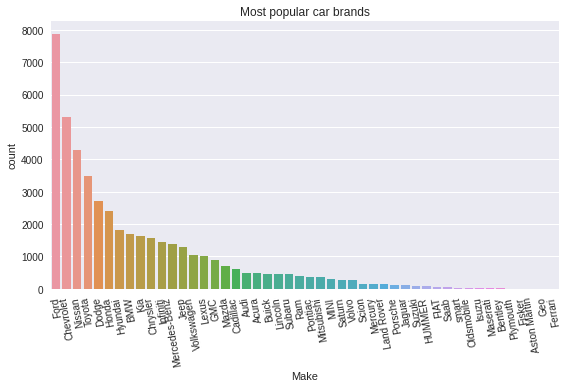

In [ ]:
desc_sort = df.groupby('Make').size().sort_values(ascending=False)
sns.countplot(x='Make', data=df, order=desc_sort.index).set(title='Most popular car brands')
plt.xticks(rotation=100)
plt.tight_layout()

**Answer for Q1**: The most popular 3 car brands are firstly Ford, secondly chevrolet, thirdly Nissan

**Q2: Do automatic cars, on average, sell for a higher price than manual cars?**


**Visualization**

[Text(0.5, 1.0, 'Average sales of manual and automatic transmissions')]

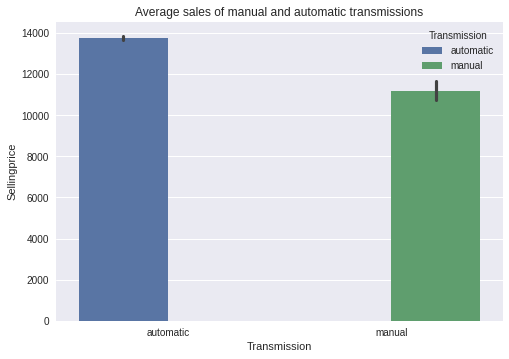

In [ ]:
sns.barplot(data=df,x="Transmission",y="Sellingprice",hue="Transmission", orient="v").set(title="Average sales of manual and automatic transmissions")

**Answer for Q2**: automatic cars, on
average sell for a higher price than manual cars

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

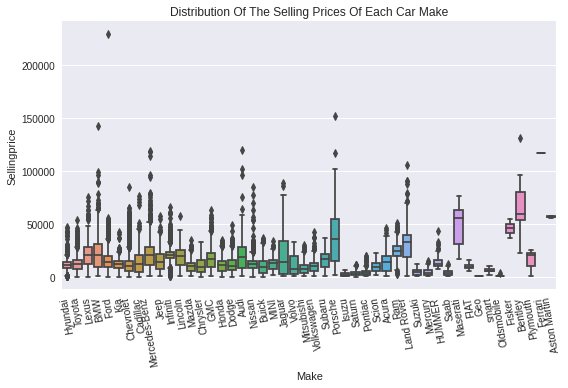

In [ ]:
sns.boxplot(data=df, y="Sellingprice", x="Make", ).set(title="Distribution Of The Selling Prices Of Each Car Make")
plt.xticks(rotation=100)
plt.tight_layout()

**Answer for Q3**: porche have the widest distribution followed by jaguar .
The most expensive cars are Ferrari follwed Porsche followed by Bentely

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

Text(0.5, 1.0, 'Scatter Plot of Odometer vs Sellingprice')

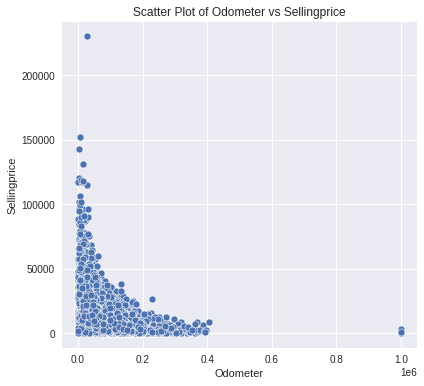

In [ ]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='Odometer', y='Sellingprice', data=df, palette='magma', ax=ax).set_title('Scatter Plot of Odometer vs Sellingprice')

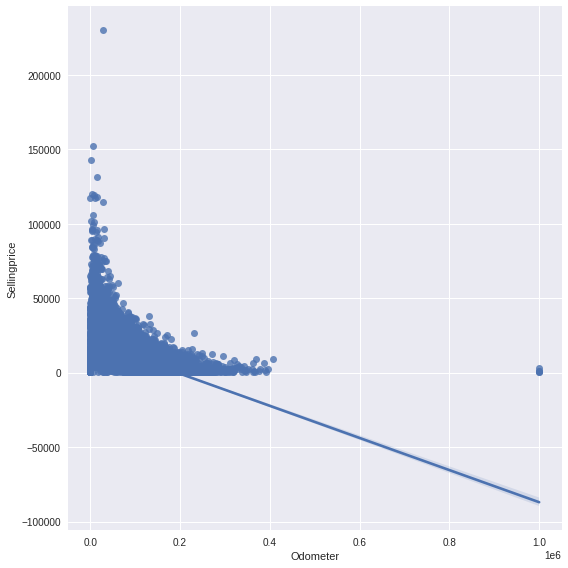

In [ ]:
sns.lmplot(x='Odometer', y='Sellingprice', data=df, palette='magma', height=8);

**Answer for Q4**: when the odometer value increase the selling price value decrease (negative correlation) 

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

Text(0.5, 1.0, 'Scatter Plot of Condition vs Sellingprice')

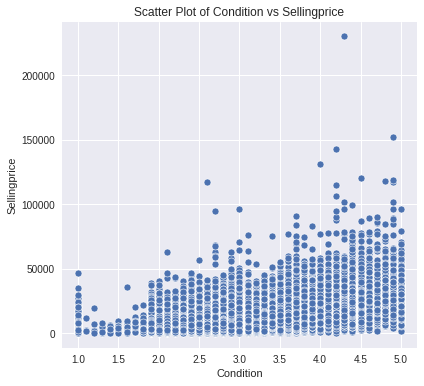

In [ ]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='Condition', y='Sellingprice', data=df, palette='viridis', ax=ax).set_title('Scatter Plot of Condition vs Sellingprice')

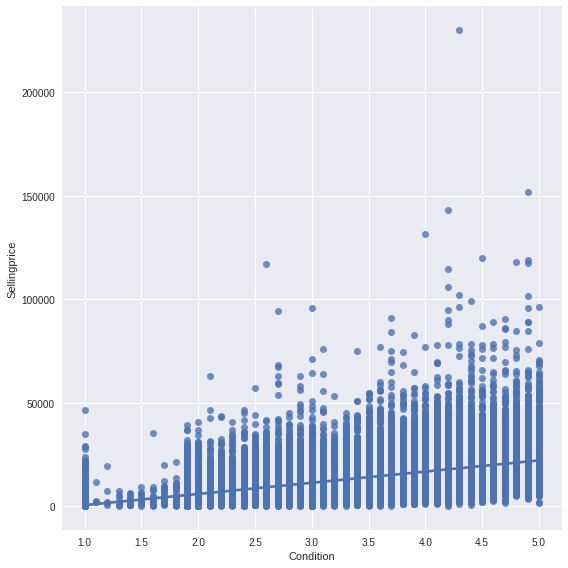

In [ ]:
sns.lmplot(x='Condition', y='Sellingprice', data=df, palette='viridis', height=8)

**Answer for Q5**: when the condition increase the price increase and when the condition decrease the price decrease (positive correlation)

**Q6: Are there differences in the average car price due to the car's body type? If so, rank their order and state the most expensive and least expensive car body type.**

**Visualization**

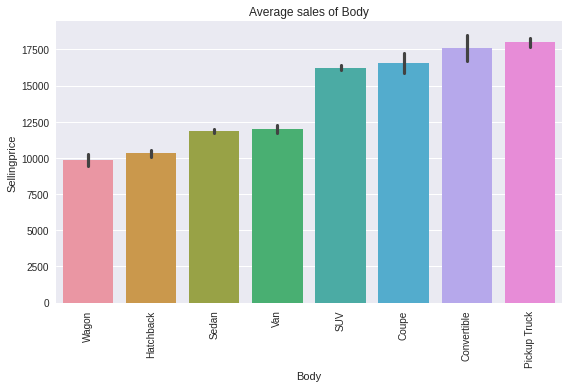

In [ ]:
#sorting the bar plot
sort = df.groupby(['Body'])['Sellingprice'].mean().sort_values().index
df['Sellingprice'].sort_values(ascending=False)

# creating the bar ploat
sns.barplot(data=df,x="Body",y="Sellingprice", orient="v",order=sort ).set(title="Average sales of Body")
plt.xticks(rotation=90)
plt.tight_layout()

**Answer for Q6**: yes there is a difference, ranked in order the highest average price is the 'Pickup Truck' followed by 'Convertible' then 'Coupe' followed by 'SUV' followed by 'Van' then 'Sedan' followed by the 'Hatchback' and the least one is the 'Wagon'


## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

Dropping or Removing '—' from the Color and Interior Columns from the dataset as they are less than 5% so dropping them is better for data consistency and encoding 

In [ ]:
#Dropping or Removing '—' 
df=df.replace("—",np.NaN)
df=df.dropna()
df[['Color','Interior',]].head(20)

,Color,Interior
0,black,gray
2,silver,black
3,black,black
4,white,gray
5,black,gray
6,gray,black
7,white,beige
8,gray,black
9,blue,gray
10,blue,black


One hot enocoding for the 'Transmission'. label enocoding for the rest. encoding is done in this way to be able to view correlations.


In [ ]:
# Import label encoder
from sklearn import preprocessing

df_encode = pd.DataFrame(data=df)


# label_encoding of 'Body','Make','Trim' , 'Color', 'interior', 'Seller', 'Model' 
label_encoder = preprocessing.LabelEncoder()
df_encode['Transmission']= label_encoder.fit_transform(df_encode['Transmission'])
df_encode['Body']= label_encoder.fit_transform(df_encode['Body'])
df_encode['Make']= label_encoder.fit_transform(df_encode['Make'])
df_encode['Trim']= label_encoder.fit_transform(df_encode['Trim'])
df_encode['Color']= label_encoder.fit_transform(df_encode['Color'])
df_encode['Interior']= label_encoder.fit_transform(df_encode['Interior'])
df_encode['Seller']= label_encoder.fit_transform(df_encode['Seller'])
df_encode['Model']= label_encoder.fit_transform(df_encode['Model'])



df_encode.head()

,Year,Make,Model,Trim,Body,Transmission,Vin,State,Condition,Odometer,Color,Interior,Seller,Mmr,Sellingprice,Saledate
0,2013,18,528,482,5,0,5npeb4acxdh702805,MA,3.9,50404.0,1,6,4140,11000,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
2,2012,25,285,271,5,0,jthbf5c24c5168599,FL,4.1,21122.0,15,1,2513,22200,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,3,602,205,4,0,5uxfb33562lh33864,FL,1.9,145303.0,1,1,3253,3675,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,13,159,371,6,0,1ftne2ew0eda31832,WA,4.9,6714.0,17,6,4300,22500,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
5,2014,23,394,595,5,0,5xxgm4a70eg329048,CO,4.6,8386.0,1,6,2368,15100,15500,Tue Jun 16 2015 05:00:00 GMT-0700 (PDT)


Checking for the correlations to understand them to see which independent numerical variable will be included in the model, mmr will not be included as it will overfit the model having 0.97 coleration with the dependent variable which is the selling price (very high)

In [ ]:
#Checking for correlations 
corr = df_encode.corr()
corr

,Year,Make,Model,Trim,Body,Transmission,Condition,Odometer,Color,Interior,Seller,Mmr,Sellingprice
Year,1.000000,-0.003842,-0.041026,0.086354,0.057725,-0.087217,0.545534,-0.775135,0.041772,-0.206527,0.009934,0.594571,0.582256
Make,-0.003842,1.000000,0.042555,-0.080019,0.031752,0.043398,-0.009234,-0.028805,-0.009029,0.000714,0.156470,-0.055500,-0.052072
Model,-0.041026,0.042555,1.000000,0.106456,0.000880,0.008817,-0.009147,0.056240,0.006018,0.025832,0.030775,0.003873,0.003164
Trim,0.086354,-0.080019,0.106456,1.000000,-0.095881,0.004842,0.057056,-0.029990,0.026121,0.010863,-0.034399,0.038209,0.037004
Body,0.057725,0.031752,0.000880,-0.095881,1.000000,-0.152061,-0.042206,0.007455,0.006726,0.038025,0.013209,-0.157471,-0.155151
Transmission,-0.087217,0.043398,0.008817,0.004842,-0.152061,1.000000,-0.030053,0.032387,-0.018378,-0.030922,-0.003594,-0.042836,-0.047059
Condition,0.545534,-0.009234,-0.009147,0.057056,-0.042206,-0.030053,1.000000,-0.538268,0.048969,-0.116956,-0.013066,0.476625,0.529541
Odometer,-0.775135,-0.028805,0.056240,-0.029990,0.007455,0.032387,-0.538268,1.000000,-0.007248,0.182055,-0.001034,-0.587006,-0.579845
Color,0.041772,-0.009029,0.006018,0.026121,0.006726,-0.018378,0.048969,-0.007248,1.000000,0.032050,0.008478,-0.014195,-0.008997
Interior,-0.206527,0.000714,0.025832,0.010863,0.038025,-0.030922,-0.116956,0.182055,0.032050,1.000000,-0.015157,-0.150880,-0.147294


one hot enconding for all the categorical columns to be ready for the model as after trying labeled encoding R Squared value is very low (0.4). and Dropping the 'Saledate' , 'Vin' , 'mmr', 'Seller' and 'State' column as its not going to be used in the model as they dont affect the selling price from a logical point view. mmr is dropped because it will cause over fitting to the model as it have very strong positive correlation with the selling price (0.97) 

In [ ]:
#Droppping the Saledate , Vin , mmr and State Columns
df = df.drop("Saledate",axis=1)
df = df.drop("Vin",axis=1)
df = df.drop("State",axis=1)
df = df.drop("Mmr",axis=1)
df = df.drop("Seller",axis=1)

# one hot encoding for 'Transmissions','Body',"Make",'Trim','Color','Interior','Seller','Model' columns to be model ready

categorical_columns = ['Transmission','Body',"Make",'Trim','Color','Interior','Model']
df_encode2 = pd.get_dummies(data=df, columns=categorical_columns, drop_first=True,dtype='int8')



df_encode2.head()

,Year,Condition,Odometer,Sellingprice,Transmission_1,Body_1,Body_2,Body_3,Body_4,Body_5,...,Model_633,Model_634,Model_635,Model_636,Model_637,Model_638,Model_639,Model_640,Model_641,Model_642
0,2013,3.9,50404.0,10900,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2012,4.1,21122.0,24200,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2002,1.9,145303.0,3200,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,4.9,6714.0,22100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2014,4.6,8386.0,15500,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


spliting the dataset into train and test to use the train for training the model

In [ ]:
# Spliting the dataset
from sklearn.model_selection import train_test_split

x = df_encode2.drop('Sellingprice',axis=1) # Independent variable
y = df_encode2['Sellingprice'] # Dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])

Training dataset size: 34675
Testing dataset size: 8669


## Modelling

_Apply the linear regression model below._

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train);

In [ ]:
parameter = ['theta_0'] + ['theta_{}'.format(i+1) for i in range(x.shape[1])]
columns = ['y-intersect'] + list(x.columns.values)
sk_theta = pd.Series([lin_reg.intercept_] + list(lin_reg.coef_))

parameter_df = pd.DataFrame({'parameter':parameter,'column':columns, 'theta_value': sk_theta})
parameter_df

,parameter,column,theta_value
0,theta_0,y-intersect,-2.061978e+06
1,theta_1,Year,1.036026e+03
2,theta_2,Condition,1.297136e+03
3,theta_3,Odometer,-4.111073e-02
4,theta_4,Transmission_1,-1.409002e+02
...,...,...,...
1799,theta_1799,Model_638,-5.575713e+03
1800,theta_1800,Model_639,-1.415939e+02
1801,theta_1801,Model_640,2.399146e+03
1802,theta_1802,Model_641,-2.307505e+03


## Model Evaluation

_Evaluate the model you applied._

Calculating R square and RMSE to evaluate the model 

In [ ]:
# sklearn regression module
y_pred = lin_reg.predict(x_test)

# Evaluation
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_pred, y_test, squared=False)

# R_square
R_square = lin_reg.score(x_test,y_test)
print('The root mean square error (RMSE) is: ', rmse)
print('R^2 obtained is:', R_square)

The root mean square error (RMSE) is:  4099.776658570219
R^2 obtained is: 0.8212435093844705


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, median_absolute_error, mean_squared_log_error
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = median_absolute_error(y_test, y_pred)

print('The mean absolute percentage error (MAPE) is: ', mape)
print('The median absolute error (MAE) is: ', mae)

The mean absolute percentage error (MAPE) is:  0.4803866196011773
The median absolute error (MAE) is:  1342.4336684898008


## Model Validation (Optional)

_Check if the model you applied meets the necessary assumptions for the chosen model._

## Conclusion and Recommendations

Comment on the model accuracy and your findings from model evaluation and validation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: 

*   Firstly calculating the R squared we got a value of 0.82 which shows that the model have high accuracy and not over fitted this result was obtained after trying different approaches and removing the mmi column as it cause over fitting (r squared = 0.92) also using one hot encoding gave better results than labeled encoding who gave a ( r squared = 0.4) which is very low accuracy for the model

*   Secondly calculating the RMSE which is 4099 and its not very high so this shows that the average deviation between the predicted car selling price and the actual car selling price  charges is 4099 dollars.

*   Thirdly trying to calculate MSLE faild as the model predicted negative values and MSLE cannot be used with negative values this can show us that we can further improve the model before deployment as the selling price canot be a negative value ( how a car is being sold for negative price ?)

*   having low values (acceptable) for MAPE and MAE

*   as we obtained an r square of 0.82 this shows that the modle fits good without overfitting and within an acceptable range and high accuracy

*   after encoding and removing the unnecessary columns the model has an optimized performane  

*   i can recomend the model for dealerships as its some how have accurate results

*   further improvements is checking for the negative selling price predicted and try to improve the model to eleminate these negative values predicted

*  check for outliers and normalize them as they can screw the model, linear regression is very sensitive to outliers 










### **BONUS**

Trying to visualize the outliers in odometer column using boxplot as shown there is some outliers that are outside the whisker of the box plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


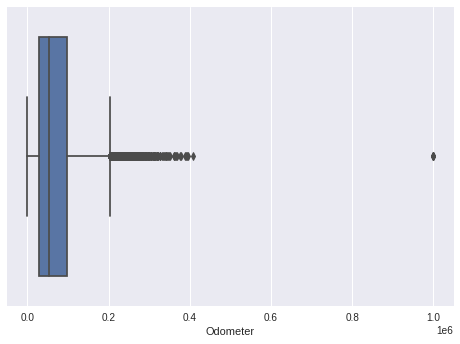

In [ ]:
# visualising the outliers 
sns.boxplot(df_encode2['Odometer'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


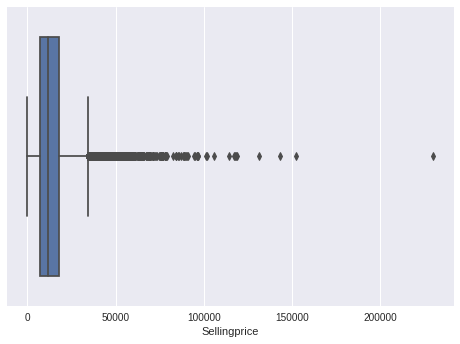

In [ ]:
# visualising the outliers 
sns.boxplot(df_encode2['Sellingprice'])

Trying to normalise the outliers in selling price and odometer 

In [ ]:
# trying to normalize the outliers 
numerical_columns = ['Odometer','Sellingprice']


df_encode2[numerical_columns] = ( 
    
    df_encode2[numerical_columns] - df_encode2[numerical_columns].min()  
    
) /( 
    
    df_encode2[numerical_columns].max() - df_encode2[numerical_columns].min()
)


df_encode2.head()

,Year,Condition,Odometer,Sellingprice,Transmission_1,Body_1,Body_2,Body_3,Body_4,Body_5,...,Model_633,Model_634,Model_635,Model_636,Model_637,Model_638,Model_639,Model_640,Model_641,Model_642
0,2013,3.9,0.050403,0.046770,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2012,4.1,0.021121,0.104633,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2002,1.9,0.145302,0.013270,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,4.9,0.006713,0.095497,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2014,4.6,0.008385,0.066783,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Spliting the dataset

In [ ]:
# Spliting the dataset
from sklearn.model_selection import train_test_split

x1 = df_encode2.drop('Sellingprice',axis=1) # Independent variable
y1 = df_encode2['Sellingprice'] # Dependent variable

x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.2,random_state=23)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])

Training dataset size: 34675
Testing dataset size: 8669


In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x1_train, y1_train);

In [ ]:
# sklearn regression module
y_pred = lin_reg.predict(x1_test)

# Evaluation
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_pred, y1_test, squared=False)

# R_square
R_square = lin_reg.score(x1_test,y1_test)
print('The root mean square error (RMSE) is: ', rmse)
print('R^2 obtained is:', R_square)

The root mean square error (RMSE) is:  6096441.184124978
R^2 obtained is: -2.0882534884408544e+16


very bad r squared value which indicate very bad accuracy
i think i did something wrong atleast i tried 😊